In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [2]:
url = 'https://en.wikipedia.org/wiki/Epidemiology_of_depression'

In [3]:
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'html.parser')

In [5]:
tables = soup.find_all('table')

In [6]:
#convert number as string to integer
#re.sub() returns the substring that match the regrex
import re
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))


In [7]:
num1 = re.sub(r'[^\w\s.]','','1,156.30')
num1

'1156.30'

In [9]:
ranks = []
rates = []
countries = []
links = []

for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        if len(cells) > 1:
            rank = cells[0]
            ranks.append(int(rank.text))
            
            country = cells[1]
            countries.append(country.text.strip())
            
            rate = cells[2]
            rates.append(process_num(rate.text.strip()))
            
            link = cells[1].find('a').get('href')
            links.append('https://en.wikipedia.org/'+ link)
            
df1 = pd.DataFrame(ranks, index= countries, columns = ['Rank'])
df1['DALY rate'] = rates

df1.head(10)

,Rank,DALY rate
United States,1,1454.74
Nepal,2,1424.48
East Timor,3,1404.10
Bangladesh,4,1401.53
India,5,1400.84
Pakistan,6,1400.42
Brazil,7,1396.10
Maldives,8,1391.61
Bhutan,9,1385.53
Afghanistan,10,1385.14


In [10]:
sun_url = urlopen('https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration')
sun = BeautifulSoup(sun_url, 'html.parser')
tables = sun.find_all('table')

#Dictionary to hold the name of the country and its corresponding temperature
country_suns = {}

#Dictionary to hold the country and its frequency in the table
count = {}
for table in tables:
    if len(table) >1:
        rows = table.find_all('tr')
        
        #Skip the first row, which is the name of the columns
        for row in rows[1:]:
            cells = row.find_all('td')
            country = cells[0].text.strip()
            
            #If country in the list of country we found previously
            #append the country to the dictionary
            if country in countries:
                
                sun = cells[-2].text.strip()
                sun = process_num(sun)/10
                
                #If country is already in the dictionary
                #add to the existing sun hours of that country and the count to keep track of how many times we add
                if country in country_suns:
                    count[country] += 1
                    country_suns[country] += sun
                    
                else:
                    count[country] = 1
                    country_suns[country] = sun
                    

#Find the average temperature of each country
for country in country_suns:
    print(country_suns[country],count[country])
    country_suns[country] = round(country_suns[country]/count[country],2)
    print('Country: {}, Sunshine Hours: {}'.format(country,country_suns[country]))
                

789.14 3
Country: Benin, Sunshine Hours: 263.05
515.99 2
Country: Togo, Sunshine Hours: 258.0
710.25 3
Country: Ghana, Sunshine Hours: 236.75
866.0500000000001 4
Country: Cameroon, Sunshine Hours: 216.51
344.03999999999996 2
Country: Gabon, Sunshine Hours: 172.02
1334.54 5
Country: Nigeria, Sunshine Hours: 266.91
711.91 2
Country: Sudan, Sunshine Hours: 355.95
336.1 1
Country: Eritrea, Sunshine Hours: 336.1
641.8 2
Country: Burkina Faso, Sunshine Hours: 320.9
320.32 1
Country: Niger, Sunshine Hours: 320.32
670.6400000000001 2
Country: Chad, Sunshine Hours: 335.32
307.0 1
Country: Gambia, Sunshine Hours: 307.0
629.2 2
Country: Senegal, Sunshine Hours: 314.6
620.5999999999999 2
Country: Somalia, Sunshine Hours: 310.3
327.9 1
Country: Djibouti, Sunshine Hours: 327.9
964.0099999999999 3
Country: Mali, Sunshine Hours: 321.34
653.3 2
Country: Algeria, Sunshine Hours: 326.65
609.99 2
Country: Tunisia, Sunshine Hours: 305.0
946.64 3
Country: Morocco, Sunshine Hours: 315.55
2253.8500000000004 6

In [20]:
df2 = pd.DataFrame.from_dict(country_suns,orient='index', columns = ['Sunshine Hours/Year'])

df = df1.join(df2)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, United States to Japan
Data columns (total 3 columns):
Rank                   192 non-null int64
DALY rate              192 non-null float64
Sunshine Hours/Year    122 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.0+ KB


In [21]:
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, United States to Japan
Data columns (total 3 columns):
Rank                   122 non-null int64
DALY rate              122 non-null float64
Sunshine Hours/Year    122 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.8+ KB


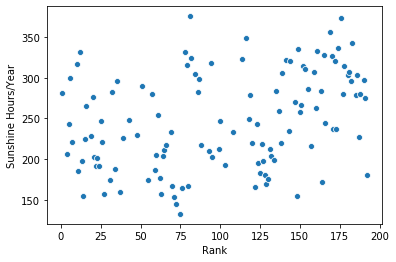

In [38]:
df.info()

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot('Rank', 'Sunshine Hours/Year', data=df)

In [36]:
df.corr()

,Rank,DALY rate,Sunshine Hours/Year
Rank,1.000000,-0.963597,0.346623
DALY rate,-0.963597,1.000000,-0.285906
Sunshine Hours/Year,0.346623,-0.285906,1.000000
